<a href="https://colab.research.google.com/github/pockypoem/orbit-ai/blob/main/Decision_Tree_Car_Evaluation.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## Description:

Pada project ini saya membangun model Decision Tree Classifier untuk memprediksi keamanan (safety) pada mobil. Awalnya, saya melakukan implementasi 2 model Decision Tree menggunakan criterion gini index dan entropy. 

Kemudian, saya berusaha untuk meningkatkan akurasinya menggunakan **hyperparameter** dan berhasil!

Pada project ini saya menggunakan **Car Evaluation Dataset** yang didownload dari UCI Machine Learning Repository website.

## Import Library

In [25]:
!pip install category_encoders

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 81.2/81.2 KB 3.1 MB/s eta 0:00:00


In [194]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.image as mpimg
import seaborn as sns
import pydotplus

from sklearn.model_selection import train_test_split
import category_encoders as ce
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score
from sklearn.metrics import confusion_matrix
from sklearn.metrics import classification_report
from sklearn import tree
from sklearn.model_selection import GridSearchCV
from  io import StringIO

import warnings

warnings.filterwarnings('ignore')


## Load Dataset

In [89]:
df = pd.read_csv('https://raw.githubusercontent.com/Wayan123/dataset-ml/main/car_evaluation.csv', header=None)
df

,0,1,2,3,4,5,6
0,vhigh,vhigh,2,2,small,low,unacc
1,vhigh,vhigh,2,2,small,med,unacc
2,vhigh,vhigh,2,2,small,high,unacc
3,vhigh,vhigh,2,2,med,low,unacc
4,vhigh,vhigh,2,2,med,med,unacc
...,...,...,...,...,...,...,...
1723,low,low,5more,more,med,med,good
1724,low,low,5more,more,med,high,vgood
1725,low,low,5more,more,big,low,unacc
1726,low,low,5more,more,big,med,good


In [90]:
df.shape

(1728, 7)

## Preprocessing Data

**Rename Column Names**

In [91]:
col_names = ['buying', 'maint', 'doors', 'persons', 'lug_boot', 'safety', 'class']


df.columns = col_names

col_names

['buying', 'maint', 'doors', 'persons', 'lug_boot', 'safety', 'class']

In [92]:
df.head()

,buying,maint,doors,persons,lug_boot,safety,class
0,vhigh,vhigh,2,2,small,low,unacc
1,vhigh,vhigh,2,2,small,med,unacc
2,vhigh,vhigh,2,2,small,high,unacc
3,vhigh,vhigh,2,2,med,low,unacc
4,vhigh,vhigh,2,2,med,med,unacc


In [93]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1728 entries, 0 to 1727
Data columns (total 7 columns):
 #   Column    Non-Null Count  Dtype 
---  ------    --------------  ----- 
 0   buying    1728 non-null   object
 1   maint     1728 non-null   object
 2   doors     1728 non-null   object
 3   persons   1728 non-null   object
 4   lug_boot  1728 non-null   object
 5   safety    1728 non-null   object
 6   class     1728 non-null   object
dtypes: object(7)
memory usage: 94.6+ KB


In [94]:
df.isnull().sum()

buying      0
maint       0
doors       0
persons     0
lug_boot    0
safety      0
class       0
dtype: int64

In [95]:
print(df['buying'].unique())
print(df['maint'].unique())
print(df['doors'].unique())
print(df['persons'].unique())
print(df['lug_boot'].unique())
print(df['safety'].unique())
print(df['class'].unique())

['vhigh' 'high' 'med' 'low']
['vhigh' 'high' 'med' 'low']
['2' '3' '4' '5more']
['2' '4' 'more']
['small' 'med' 'big']
['low' 'med' 'high']
['unacc' 'acc' 'vgood' 'good']


## Exploratory Data Analysis

In [96]:
# Frequency distribution of values in variables

col_names = ['buying', 'maint', 'doors', 'persons', 'lug_boot', 'safety', 'class']

for col in col_names:    
    print(df[col].value_counts())   

vhigh    432
high     432
med      432
low      432
Name: buying, dtype: int64
vhigh    432
high     432
med      432
low      432
Name: maint, dtype: int64
2        432
3        432
4        432
5more    432
Name: doors, dtype: int64
2       576
4       576
more    576
Name: persons, dtype: int64
small    576
med      576
big      576
Name: lug_boot, dtype: int64
low     576
med     576
high    576
Name: safety, dtype: int64
unacc    1210
acc       384
good       69
vgood      65
Name: class, dtype: int64


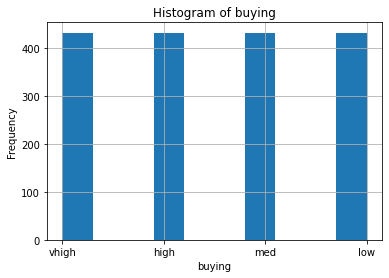

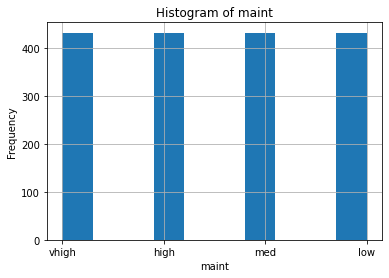

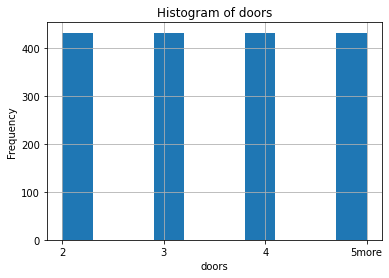

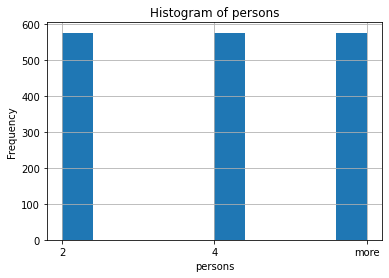

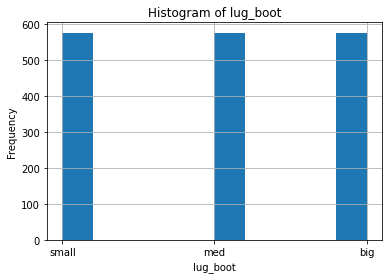

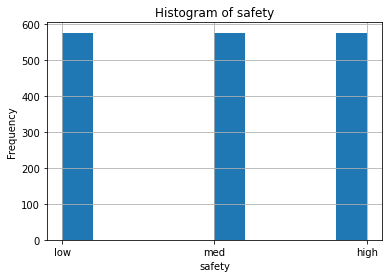

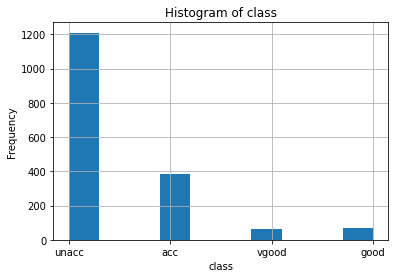

In [97]:
# create historgam plot to see the frequency distribution clearly

for column in df.columns:
    df[column].hist()

    plt.title('Histogram of ' + column)
    plt.xlabel(column)
    plt.ylabel('Frequency')

    # Show the plot
    plt.show()

In [98]:
df['class'].value_counts()

unacc    1210
acc       384
good       69
vgood      65
Name: class, dtype: int64

## Train Test Split

In [99]:
X = df.drop(['class'], axis=1)

y = df['class']

In [100]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 42)

In [101]:
X_train.shape, X_test.shape

((1382, 6), (346, 6))

In [102]:
X.head()

,buying,maint,doors,persons,lug_boot,safety
0,vhigh,vhigh,2,2,small,low
1,vhigh,vhigh,2,2,small,med
2,vhigh,vhigh,2,2,small,high
3,vhigh,vhigh,2,2,med,low
4,vhigh,vhigh,2,2,med,med


In [103]:
y

0       unacc
1       unacc
2       unacc
3       unacc
4       unacc
        ...  
1723     good
1724    vgood
1725    unacc
1726     good
1727    vgood
Name: class, Length: 1728, dtype: object

In [104]:
X_train.dtypes

buying      object
maint       object
doors       object
persons     object
lug_boot    object
safety      object
dtype: object

In [105]:
# Encoding 

encoder = ce.OrdinalEncoder(cols=['buying', 'maint', 'doors', 'persons', 'lug_boot', 'safety'])

X_train = encoder.fit_transform(X_train)
X_test = encoder.transform(X_test)

In [106]:
X_train.head()

,buying,maint,doors,persons,lug_boot,safety
107,1,1,1,1,1,1
901,2,1,2,2,2,2
1709,3,2,1,3,1,1
706,4,3,3,3,3,2
678,4,3,2,3,3,3


In [107]:
y

0       unacc
1       unacc
2       unacc
3       unacc
4       unacc
        ...  
1723     good
1724    vgood
1725    unacc
1726     good
1727    vgood
Name: class, Length: 1728, dtype: object

## Build Model DT Classifier with Criterion Gini Index

**Train Model**

In [195]:
clf_gini = DecisionTreeClassifier(criterion='gini', max_depth=3, random_state=0)
clf_gini.fit(X_train, y_train)

DecisionTreeClassifier(max_depth=3, random_state=0)

**Evaluate Model**

In [197]:
y_pred_gini_train = clf_gini.predict(X_train)
y_pred_gini_test = clf_gini.predict(X_test)

In [198]:
print('Model accuracy (train) score with criterion gini index: {0:0.4f}'. format(accuracy_score(y_train, y_pred_gini_train)))
print('Model accuracy (test) score with criterion gini index: {0:0.4f}'. format(accuracy_score(y_test, y_pred_gini_test)))

Model accuracy (train) score with criterion gini index: 0.8025
Model accuracy (test) score with criterion gini index: 0.8179


In [199]:
confusion_matrix(y_test, y_pred_gini_test)

array([[ 65,   0,  18,   0],
       [ 11,   0,   0,   0],
       [ 17,   0, 218,   0],
       [ 17,   0,   0,   0]])

**Generate Classification Report**

In [200]:
print(classification_report(y_test, y_pred_gini_test))

              precision    recall  f1-score   support

         acc       0.59      0.78      0.67        83
        good       0.00      0.00      0.00        11
       unacc       0.92      0.93      0.93       235
       vgood       0.00      0.00      0.00        17

    accuracy                           0.82       346
   macro avg       0.38      0.43      0.40       346
weighted avg       0.77      0.82      0.79       346



## Build Model DT with Criterion Entropy

**Train Model**

In [201]:
clf_gini = DecisionTreeClassifier(criterion='entropy', max_depth=3, random_state=0)
clf_gini.fit(X_train, y_train)

DecisionTreeClassifier(criterion='entropy', max_depth=3, random_state=0)

**Evaluate Model**

In [202]:
y_pred_gini_train = clf_gini.predict(X_train)
y_pred_gini_test = clf_gini.predict(X_test)

In [203]:
print('Model accuracy (train) score with criterion gini index: {0:0.4f}'. format(accuracy_score(y_train, y_pred_gini_train)))
print('Model accuracy (test) score with criterion gini index: {0:0.4f}'. format(accuracy_score(y_test, y_pred_gini_test)))

Model accuracy (train) score with criterion gini index: 0.8025
Model accuracy (test) score with criterion gini index: 0.8179


In [204]:
confusion_matrix(y_test, y_pred_gini_test)

array([[ 65,   0,  18,   0],
       [ 11,   0,   0,   0],
       [ 17,   0, 218,   0],
       [ 17,   0,   0,   0]])

**Generate Classification Report**

In [205]:
print(classification_report(y_test, y_pred_gini_test))

              precision    recall  f1-score   support

         acc       0.59      0.78      0.67        83
        good       0.00      0.00      0.00        11
       unacc       0.92      0.93      0.93       235
       vgood       0.00      0.00      0.00        17

    accuracy                           0.82       346
   macro avg       0.38      0.43      0.40       346
weighted avg       0.77      0.82      0.79       346



## Hyperparameter

In [206]:
hyperparameters = {
    "max_depth": [3, 5, 7],
    "criterion": ["gini", "entropy"],
    "splitter": ["best", "random"],
    "min_samples_split": [2, 5, 8]
}

model = GridSearchCV(
    DecisionTreeClassifier(random_state=42),
    param_grid = hyperparameters,
    cv = 5
)

model.fit(X_train, y_train)

GridSearchCV(cv=5, estimator=DecisionTreeClassifier(random_state=42),
             param_grid={'criterion': ['gini', 'entropy'],
                         'max_depth': [3, 5, 7], 'min_samples_split': [2, 5, 8],
                         'splitter': ['best', 'random']})

In [207]:
print("Hyperparameters Terbaik:", model.best_params_)
print("Score Terbaik:", model.best_score_)

Hyperparameters Terbaik: {'criterion': 'gini', 'max_depth': 7, 'min_samples_split': 2, 'splitter': 'best'}
Score Terbaik: 0.9052006487730864


In [208]:
clf_best = model.best_estimator_ 
clf_best

DecisionTreeClassifier(max_depth=7, random_state=42)

**Evaluate Model**

In [209]:
y_pred_train = clf_best.predict(X_train)
y_pred_test = clf_best.predict(X_test)

In [210]:
print('Model accuracy (train) score with criterion gini index: {0:0.4f}'. format(accuracy_score(y_train, y_pred_train)))
print('Model accuracy (test) score with criterion gini index: {0:0.4f}'. format(accuracy_score(y_test, y_pred_test)))

Model accuracy (train) score with criterion gini index: 0.9103
Model accuracy (test) score with criterion gini index: 0.8786


In [211]:
confusion_matrix(y_test, y_pred_test)

array([[ 65,  10,   8,   0],
       [  4,   3,   0,   4],
       [  3,   0, 232,   0],
       [ 13,   0,   0,   4]])

**Generate Classification Report**

In [212]:
print(classification_report(y_test, y_pred_test))

              precision    recall  f1-score   support

         acc       0.76      0.78      0.77        83
        good       0.23      0.27      0.25        11
       unacc       0.97      0.99      0.98       235
       vgood       0.50      0.24      0.32        17

    accuracy                           0.88       346
   macro avg       0.62      0.57      0.58       346
weighted avg       0.87      0.88      0.87       346



In [213]:
feature_names = X.columns
feature_names

Index(['buying', 'maint', 'doors', 'persons', 'lug_boot', 'safety'], dtype='object')

In [214]:
clf_best.feature_importances_

array([0.15505778, 0.15644193, 0.00385849, 0.30413242, 0.06542914,
       0.31508025])

In [215]:
feature_importance = pd.DataFrame(clf_best.feature_importances_, index = feature_names).sort_values(0, ascending=False)
feature_importance

,0
safety,0.315080
persons,0.304132
maint,0.156442
buying,0.155058
lug_boot,0.065429
doors,0.003858


In [216]:
class_names = pd.DataFrame(clf_best.classes_)
class_names

,0
0,acc
1,good
2,unacc
3,vgood


In [217]:
features = list(feature_importance[feature_importance[0]>0].index)
features

['safety', 'persons', 'maint', 'buying', 'lug_boot', 'doors']

<AxesSubplot:>

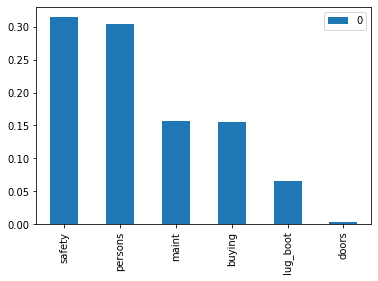

In [218]:
feature_importance.plot(kind='bar')

In [219]:
dot_data = StringIO()
filename = "visualize-DT.png"
out = tree.export_graphviz(clf_best, feature_names=feature_names, out_file=dot_data,
                           filled=True, special_characters=True, rotate=False)  
graph = pydotplus.graph_from_dot_data(dot_data.getvalue())  
graph.write_png(filename)
img = mpimg.imread(filename)
plt.figure(figsize=(300, 400))
plt.imshow(img,interpolation='nearest')

## Kesimpulan

1. Data yang diberikan bisa dibilang lumayan untuk studi kasus sederhana ini yaitu sebesar 1728 data. 
2. Data yang diberikan juga sudah bersih.
3. Variabel Independen dari data terdiri dari: safety, persons, maint, buying, lug_boot, dan doors
4. Variabel Dependen terdiri dari: acc, good, unacc, dan vgood
5. Pembagian data latih dan data uji yang saya lakukan adalah 80/20, dimana 80% adalah data latih dan 20% adalah data uji
6. Skor Akurasi Decision Tree sebelum hyperparameter sebesar 0.8179
7. Skor Akurasi setelah dilakukan hyperparameters dengan ketentuan: 'criterion': 'gini', 'max_depth': 7, 'min_samples_split': 2, 'splitter': 'best', diperoleh **skor akurasi sebesar 0.9052006487730864**
8. Pernyataan pada poin 7 didukung dengan hasil classification report
9. Dalam pemodelan Decision Tree, terdapat 2 fitur yang paling penting yaitu: 'safety' dan 'persons'
10. Fitur yang memiliki nilai terendah adalah 'doors'

<center><h3> Sekian & Terimakasih </h3></center>